The classic birthday problem asks about how many people need to be in a room together before you have better-than-even odds that at least two of them have the same birthday. Ignoring leap years, the answer is, paradoxically, only 23 people — fewer than you might intuitively think.

But Joel noticed something interesting about a well-known group of 100 people: In the U.S. Senate, three senators happen to share the same birthday of October 20: Kamala Harris, Brian Schatz and Sheldon Whitehouse.

And so Joel has thrown a new wrinkle into the classic birthday problem. How many people do you need to have better-than-even odds that at least three of them have the same birthday? (Again, ignore leap years.)

In [1]:
import numpy as np
import numpy.random as random
import collections

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
matplotlib.style.use('fivethirtyeight')

In [2]:
max_people = 500 # largest group size we might care about
max_matches = 5  # matches value of 1 means that two people share a birthday. value of 2 -> 3 people share a b-day, etc.
days = 365 # days in a year
samples = 1000 # number of samples to collect for each size group
prob = np.zeros((max_matches, max_people), dtype=float) # initialize array to hold probabilities
hits = 0 # dummy variable for detecting a match

# brute force
for k in range(0, max_matches): # repeat for 2, 3, 4, 5, ...N people who share the same birthday
    print(k+1, 'matches -----')
    for j in range(1, max_people+1): # iterate through a group size of 1 to the max size
        for i in range(0, samples): # create a random sample of group size j and detect whether there are at least k matching values
            birthdays = [int(365*x) for x in random.rand(j)]
            if (len([date for date, count in collections.Counter(birthdays).items() if count > k+1]) > 0):
                hits += 1
        prob[k][j-1] = (hits/samples) # append the number of samples with a successful match / total samples to the probability array
        if(hits/samples > 0.51): # important time saver. If we're over 51%, don't bother with the rest of the loop
            hits = 0
            break
        hits = 0 # reset
        
# vectorized - WIP need to get Counter to work with numpy arrays. counting unique values doesn't work for 2 sets of people
# sharing their birthdays
#for k in range(0, max_matches):
#    for j in tqdm(range(1, max_people+1)):
#        birthdays = (365*np.random.rand(samples, j)).astype(int)
#        unique_vals = [(len(np.unique(birthdays[:][x]))<(max_people-k)) for x in range(birthdays.shape[0])]
#        prob[k][j-1] = sum(unique_vals)/samples

1 matches -----
2 matches -----
3 matches -----
4 matches -----
5 matches -----


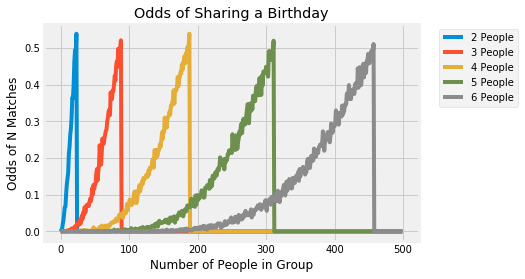

0.404


In [3]:
x_ax = range(0, max_people)

fig, ax = plt.subplots()
ax.plot(x_ax, prob[0], label='2 People')
ax.plot(x_ax, prob[1], label='3 People')
ax.plot(x_ax, prob[2], label='4 People')
ax.plot(x_ax, prob[3], label='5 People')
ax.plot(x_ax, prob[4], label='6 People')

plt.xlabel('Number of People in Group')
plt.ylabel('Odds of N Matches')
plt.title('Odds of Sharing a Birthday')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.show()
print(prob[4][438])

[21, 87, 185, 305, 454]


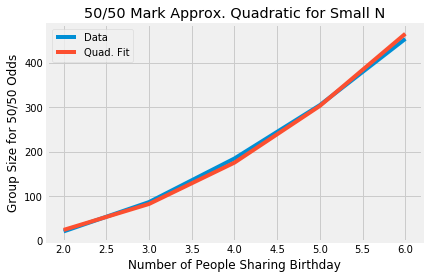

In [4]:
from sklearn.linear_model import LinearRegression as LR
lr = LR()

odds_50 = [np.abs(prob[x]-0.5).argmin() for x in range(0, prob.shape[0])]
print(odds_50)
X = np.array(range(1, prob.shape[0]+1)).reshape(-1, 1)
Y = np.sqrt(odds_50)
lr.fit(X, Y)
yhat = lr.predict(X)


fig, ax = plt.subplots()

ax.plot(X+1, odds_50, label='Data')
ax.plot(X+1, yhat**2, label='Quad. Fit')

plt.xlabel('Number of People Sharing Birthday')
plt.ylabel('Group Size for 50/50 Odds')
plt.title('50/50 Mark Approx. Quadratic for Small N')

plt.legend(loc="upper left")

plt.show()

0.023190036174567687

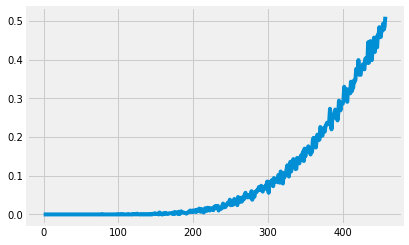

In [16]:
import pandas as pd
prob_6 = pd.Series(prob[4][:458])
plt.plot(prob_6)
std = prob_6.rolling(10).std()
std[438]